# Libraries

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import plot_tree
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset

In [2]:
df = pd.read_csv('data.csv')  
df = df.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')

In [3]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

# Convert Categorical data to Numerical

In [4]:
#  One-Hot Encoding 
df_encoded = pd.get_dummies(df, columns=['diagnosis'], prefix='diagnosis')
df_encoded['diagnosis_M'] = df_encoded['diagnosis_M'].astype(int)
df_encoded['diagnosis_B'] = df_encoded['diagnosis_B'].astype(int)
df_encoded.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  perimeter_worst  area_worst  smoothness_worst  \
0                 0.07871  ...           184.60      2019.0            0.1622   
1                 0.05667  ...           158.80      1956.0            0.1238   
2                 0.05999  ...           152.50      1709.0            0.1444   
3                 0.09744  ...            98.87       567.7            0.2098   
4                 0.05883  ...           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  diagnosis_B  diagnosis_M  
0                  0.11890            0            1  
1                  0.08902            0            1  
2                  0.08758            0            1  
3                  0.17300            0            1  
4                  0.07678            0            1  

[5 rows x 32 columns]

# Outliers

# Replacing outliers with the classed median

In [5]:
#  جایگزینی داده‌های پرت با میانه کلاس‌بندی‌شده
def replace_outliers_with_class_median(df, column, target_column='diagnosis_M'):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # محاسبه میانه برای هر کلاس
    median_by_class = df.groupby(target_column)[column].median()
    
    # جایگزینی پرت‌ها با میانه کلاس مربوطه
    for class_label in df[target_column].unique():
        mask = (df[target_column] == class_label) & ((df[column] < lower_bound) | (df[column] > upper_bound))
        df.loc[mask, column] = median_by_class[class_label]
    return df

# اعمال روی تمام ستون‌های عددی (به جز هدف)
numeric_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    if column != 'diagnosis_M':
        df_encoded = replace_outliers_with_class_median(df_encoded, column)

print("\nدیتاست بعد از جایگزینی پرت‌ها با میانه کلاس‌بندی‌شده:")
print(df_encoded.head())


دیتاست بعد از جایگزینی پرت‌ها با میانه کلاس‌بندی‌شده:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.10220   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.13235         0.15135              0.14710         0.2419   
1           0.07864         0.08690              0.07017         0.1812   
2           0.15990         0.19740              0.12790         0.2069   
3           0.13235         0.24140              0.10520         0.1899   
4           0.13280         0.19800              0.10430         0.1809   

   fractal_dimension_mean  ...  perim

# Train and Test Data

In [6]:
X = df_encoded.drop(['diagnosis_M'], axis=1)
y = df_encoded['diagnosis_M']

# 4. تقسیم اولیه به Train و (Validation + Test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.702, random_state=100)  # حداقل 70% آموزش

# 5. تقسیم دوم به Validation و Test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=100)  # 15% از کل برای تست، بقیه برای اعتبارسنجی

# چک دقیق درصدها
total_samples = len(X)
print(f"تعداد کل نمونه‌ها: {total_samples}")
print(f"تعداد نمونه‌های آموزش: {len(X_train)} ({len(X_train)/total_samples*100:.2f}%)")
print(f"تعداد نمونه‌های تست: {len(X_test)} ({len(X_test)/total_samples*100:.2f}%)")
print(f"تعداد نمونه‌های اعتبارسنجی: {len(X_val)} ({len(X_val)/total_samples*100:.2f}%)")

تعداد کل نمونه‌ها: 569
تعداد نمونه‌های آموزش: 399 (70.12%)
تعداد نمونه‌های تست: 85 (14.94%)
تعداد نمونه‌های اعتبارسنجی: 85 (14.94%)


# Normalize

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [8]:
selector = SelectKBest(score_func=f_classif, k=20)
X_train_scaled_selected = selector.fit_transform(X_train_scaled, y_train)
X_val_scaled_selected = selector.transform(X_val_scaled)
X_test_scaled_selected = selector.transform(X_test_scaled)

# گرفتن نام ویژگی‌های انتخاب‌شده
all_feature_names = X.columns.tolist()
selected_mask = selector.get_support()
feature_names = [all_feature_names[i] for i in range(len(selected_mask)) if selected_mask[i]]
print("\nویژگی‌های انتخاب‌شده:", feature_names)


ویژگی‌های انتخاب‌شده: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']


# Model fitting

In [13]:
model = RandomForestClassifier(n_estimators=70, max_depth=3, min_samples_split=10, min_samples_leaf=5, class_weight='balanced', random_state=100)

model.fit(X_train_scaled_selected, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=70, random_state=100)

# Cross-Validation 

# Accuracy on validation data

In [15]:
y_val_pred = model.predict(X_val_scaled_selected)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"دقت روی دیتای اعتبارسنجی: {val_accuracy:.3f}")

دقت روی دیتای اعتبارسنجی: 0.953


# Accuracy on train data

In [201]:
y_train_pred = model.predict(X_train_scaled_selected)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"دقت روی دیتای آموزشی: {train_accuracy:.3f}")

دقت روی دیتای آموزشی: 0.975


# Evaluation on test data

In [16]:
y_test_pred = model.predict(X_test_scaled_selected)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"دقت روی دیتای تست: {test_accuracy:.3f}")
print("\nگزارش طبقه‌بندی برای دیتای تست:")
print(classification_report(y_test, y_test_pred, target_names=['خوش‌خیم', 'بدخیم']))

دقت روی دیتای تست: 0.965

گزارش طبقه‌بندی برای دیتای تست:
              precision    recall  f1-score   support

     خوش‌خیم       0.96      0.98      0.97        49
       بدخیم       0.97      0.94      0.96        36

    accuracy                           0.96        85
   macro avg       0.97      0.96      0.96        85
weighted avg       0.96      0.96      0.96        85



In [14]:
# تعریف پارامترهای محدودتر برای کاهش Overfitting
param_grid = {
    'max_depth': [3, 5],  # محدوده کمتر برای سادگی بیشتر
    'min_samples_split': [10, 20],  # حداقل نمونه برای تقسیم
    'min_samples_leaf': [5, 7],  # حداقل نمونه در برگ‌ها
    'n_estimators': [50, 70]  # تعداد درخت‌ها کمتر
}

#  تنظیم و فیت GridSearchCV
rf = RandomForestClassifier(class_weight='balanced', random_state=100)  # وزن متعادل برای کلاس‌ها
grid = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled_selected, y_train)

# نمایش بهترین پارامترها
best_params = grid.best_params_
print("بهترین پارامترها:", best_params)

#  ارزیابی نهایی
y_pred_test = grid.best_estimator_.predict(X_test_scaled_selected)
y_pred_val = grid.best_estimator_.predict(X_val_scaled_selected)  # تغییر به y_pred_val

#  بررسی دقت و اختلاف
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_val = accuracy_score(y_val, y_pred_val)  # تغییر به accuracy_val
difference = abs(accuracy_test - accuracy_val)
print("دقت تست:", accuracy_test)
print("دقت اعتبارسنجی:", accuracy_val)
print("اختلاف:", difference)
print("\nگزارش طبقه‌بندی برای دیتای تست:")
print(classification_report(y_test, y_pred_test, target_names=['خوش‌خیم', 'بدخیم']))

بهترین پارامترها: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 70}
دقت تست: 0.9647058823529412
دقت اعتبارسنجی: 0.9529411764705882
اختلاف: 0.01176470588235301

گزارش طبقه‌بندی برای دیتای تست:
              precision    recall  f1-score   support

     خوش‌خیم       0.96      0.98      0.97        49
       بدخیم       0.97      0.94      0.96        36

    accuracy                           0.96        85
   macro avg       0.97      0.96      0.96        85
weighted avg       0.96      0.96      0.96        85



# Random forest

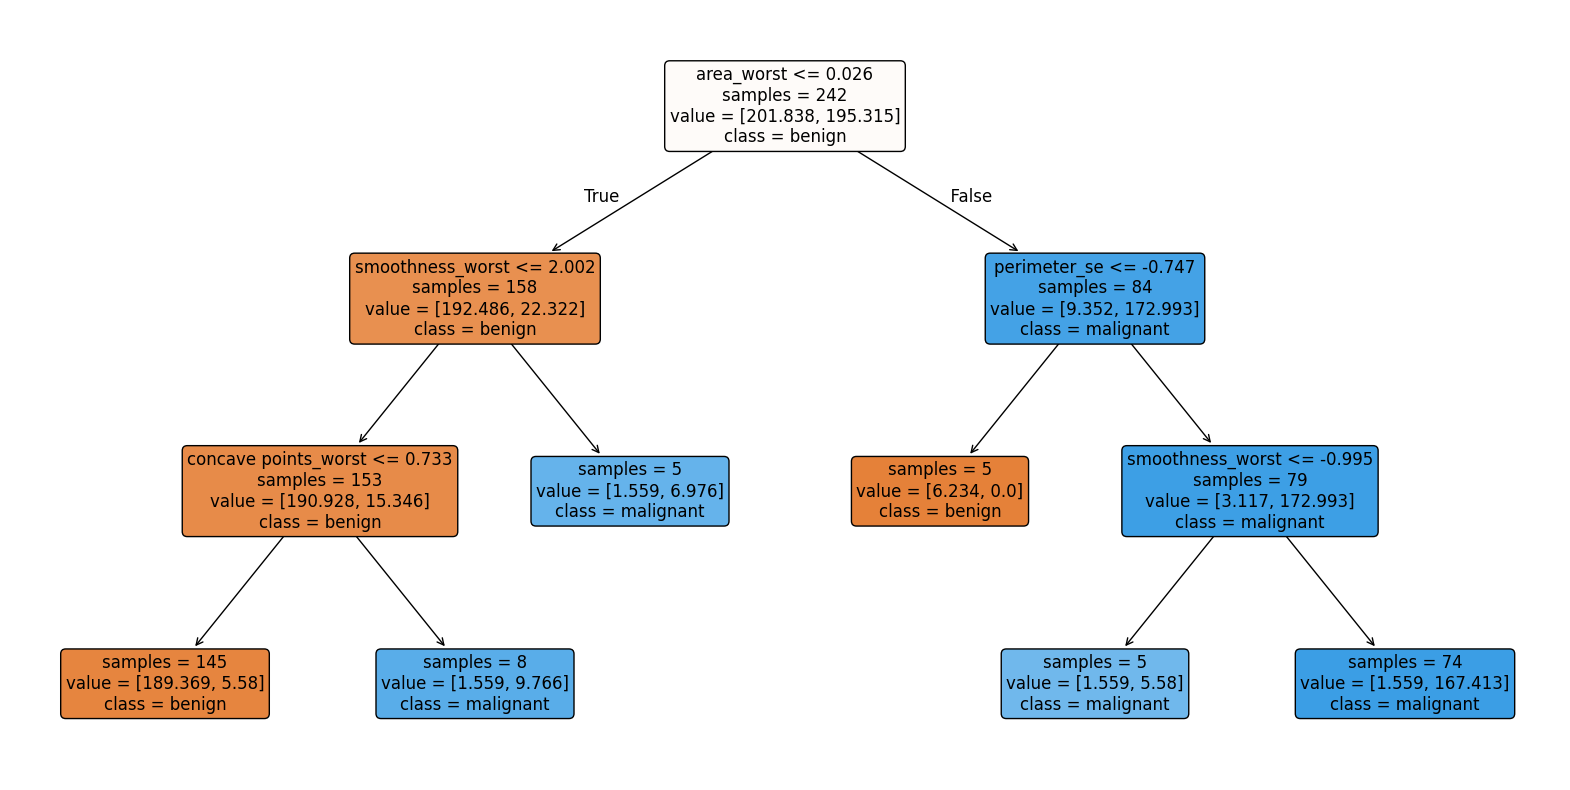

In [17]:
# گرفتن اولین درخت از مدل 
estimator = model.estimators_[0]  # اولین درخت

plt.figure(figsize=(20, 10))  
plot_tree(estimator, feature_names=feature_names, class_names=[ 'benign','malignant'], filled=True, rounded=True, impurity=False, fontsize=12)
plt.show()

# Confusion Matrix

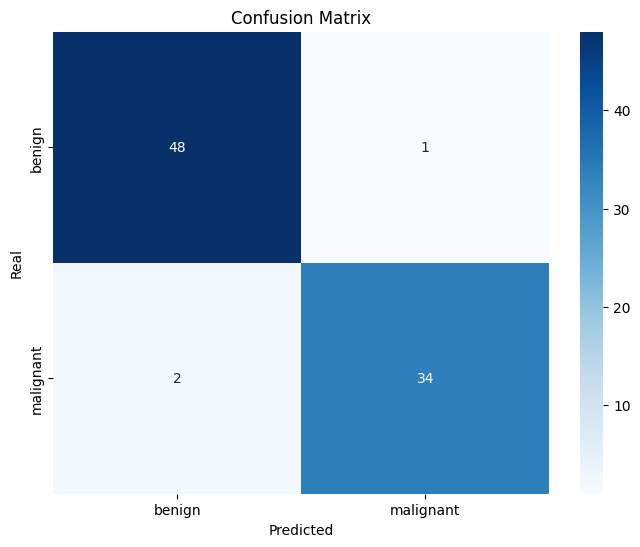


گزارش طبقه‌بندی برای دیتای تست:
              precision    recall  f1-score   support

     خوش‌خیم       0.96      0.98      0.97        49
       بدخیم       0.97      0.94      0.96        36

    accuracy                           0.96        85
   macro avg       0.97      0.96      0.96        85
weighted avg       0.96      0.96      0.96        85



In [19]:
# ماتریس درهم‌ریختگی برای دیتای تست (گرافیکی)
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['benign', 'malignant'], yticklabels=['benign', 'malignant'])
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

print("\nگزارش طبقه‌بندی برای دیتای تست:")
print(classification_report(y_test, y_test_pred, target_names=['خوش‌خیم', 'بدخیم']))

# Optimal parameters

In [17]:
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': model.feature_importances_})
print("\nچند ویژگی مهم بر اساس اهمیت مدل:")
print(feature_importance.sort_values(by='Importance', ascending=False).head(10))


چند ویژگی مهم بر اساس اهمیت مدل:
                 Feature  Importance
17       perimeter_worst    0.176720
18            area_worst    0.163373
15          radius_worst    0.126067
7    concave points_mean    0.108063
22  concave points_worst    0.097432
2         perimeter_mean    0.073502
3              area_mean    0.046142
6         concavity_mean    0.042901
21       concavity_worst    0.027307
9              radius_se    0.021423
